In [1]:
#Import all libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
#from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras import regularizers

C:\Users\Bernardo\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.


In [2]:
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dropout, Input
from tensorflow.python.keras.layers import MaxPooling1D
from keras.utils import np_utils
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalMaxPooling1D, GlobalMaxPooling3D
import tensorflow as tf
from tensorflow.keras.metrics import SpecificityAtSensitivity, SensitivityAtSpecificity, BinaryAccuracy, Accuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam as Adam
import json

import keras.backend.tensorflow_backend as K


# PROCESSAMENTO DE DADOS

# 1) Carrega dados do arquivo (pré-processados)

In [3]:
df_dados=pd.read_csv('df_dados_quadrado.csv')
malig=np.ones(len(df_dados),dtype=int)
malig[np.where(df_dados['tirads'].values=='2')]=0
malig[np.where(df_dados['tirads'].values=='3')]=0
df_dados['malig']=malig


#for i in range(0,len(df_dados)):
#    df_dados['marks'][i]=eval(df_dados['marks'][i])
    
df_dados.head()


,Unnamed: 0,marks,tirads,malig
0,0,"[[93, 77, 70, 76, 79, 87, 98, 108, 117, 129, 1...",4a,1
1,1,"[[19, 30, 43, 54, 61, 57, 48, 40, 32, 25, 48, ...",4c,1
2,2,"[[52, 51, 33, 39, 58, 73, 65, 50, 56, 74, 53, ...",4b,1
3,3,"[[85, 109, 111, 99, 103, 109, 104, 99, 97, 86,...",4c,1
4,4,"[[124, 119, 108, 101, 93, 105, 109, 110, 105, ...",4c,1


In [5]:
gray_three=[]
for i in range (452):
        image = cv2.imread('C:/Users/Bernardo/TCC/recorte_quadrado/'+str(i)+'.png')
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_three1 = (cv2.merge([gray,gray,gray]))
        gray_three.append(gray_three1)


In [6]:
np.shape(gray_three)

(452, 288, 432, 3)

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts w

C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Bernardo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


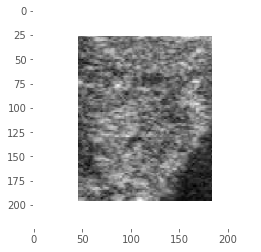

In [7]:
nimg=len(gray_three)
nx=224 #np.shape(gray_three)[1] #dimensão x
ny=224 #np.shape(gray_three)[2] #dimensão y

X=np.zeros(((nimg,nx,ny,3)))
for id_ in range (len(gray_three)):
    x_img = gray_three[id_]
    x_img = resize(x_img, (nx, ny,3), mode = 'constant', preserve_range = True)    
    X[id_,:,:]=x_img/255

#exemplo de imagem
plt.imshow(X[0,:,:],cmap='Greys')
plt.grid(False)

In [8]:
Y=df_dados['malig'].values


In [9]:
print(str(len(np.where(Y==0)[0])) + ' casos benignos')
print(str(len(np.where(Y==1)[0])) + ' casos malignos')
print(str(len(np.where(Y==1)[0])+len(np.where(Y==0)[0]))+' CASOS TOTAIS')

91 casos benignos
361 casos malignos
452 CASOS TOTAIS


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2)
test_size = (X_valid.shape[0]/X_train.shape[0])

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=42)

In [11]:
weights=class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
weights[0]

2.5422535211267605

In [12]:
weights[1]

0.6224137931034482

In [13]:
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(nx,ny,3))
base_model.trainable = False

######################

conf = json.loads(base_model.to_json())
for l in conf['config']['layers']:
    if l['class_name'] == 'BatchNormalization':
        l['config']['momentum'] = 0.90
        l['config']['trainable']= True

m = base_model.from_config(conf['config'])
for l in base_model.layers:
    m.get_layer(l.name).set_weights(l.get_weights())

base_model = m

##################
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.4)) #diminuir dropout (0.1 ou 0.2)
model.add(Dense(100, activation='relu'))#',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.1)
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))   #testar tangente hiperbólico

# ####################Compile model
epochs = 100
#learning_rate = 0.0001
#decay_rate = learning_rate / epochs
#adam = Adam(lr=learning_rate, decay=decay_rate)
adam = Adam(lr=0.0001)


#############################
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
tf.random.set_seed(2)
#model.summary()




In [14]:
rede=model.fit(X_train, y_train, epochs=epochs, class_weight= {0:weights[0], 1:weights[1]}, validation_data=(X_valid, y_valid), batch_size=10)


Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.7048 - accuracy: 0.60 - ETA: 1:02 - loss: 0.8258 - accuracy: 0.45 - ETA: 1:21 - loss: 0.9261 - accuracy: 0.50 - ETA: 1:27 - loss: 0.8732 - accuracy: 0.55 - ETA: 1:30 - loss: 0.7943 - accuracy: 0.56 - ETA: 1:31 - loss: 0.7812 - accuracy: 0.55 - ETA: 1:30 - loss: 0.8149 - accuracy: 0.54 - ETA: 1:28 - loss: 0.7875 - accuracy: 0.51 - ETA: 1:29 - loss: 0.8414 - accuracy: 0.52 - ETA: 1:27 - loss: 0.8926 - accuracy: 0.53 - ETA: 1:26 - loss: 0.8880 - accuracy: 0.50 - ETA: 1:25 - loss: 0.8930 - accuracy: 0.50 - ETA: 1:22 - loss: 0.9007 - accuracy: 0.50 - ETA: 1:21 - loss: 0.8673 - accuracy: 0.52 - ETA: 1:18 - loss: 0.9095 - accuracy: 0.52 - ETA: 1:16 - loss: 0.9133 - accuracy: 0.51 - ETA: 1:13 - loss: 0.9433 - accuracy: 0.52 - ETA: 1:09 - loss: 0.9385 - accuracy: 0.52 - ETA: 1:05 - loss: 0.9401 - accuracy: 0.52 - ETA: 1:01 - loss: 1.0386 - accuracy: 0.51 - ETA: 57s - loss: 1.0554 - accuracy: 0.5095 - ETA: 54s - loss: 1.0313 

37/37 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.50 - ETA: 59s - loss: 0.6110 - accuracy: 0.600 - ETA: 1:14 - loss: 0.5976 - accuracy: 0.63 - ETA: 1:25 - loss: 0.6208 - accuracy: 0.67 - ETA: 1:29 - loss: 0.6355 - accuracy: 0.66 - ETA: 1:31 - loss: 0.6629 - accuracy: 0.63 - ETA: 1:30 - loss: 0.6520 - accuracy: 0.61 - ETA: 1:29 - loss: 0.6297 - accuracy: 0.61 - ETA: 1:27 - loss: 0.6290 - accuracy: 0.61 - ETA: 1:26 - loss: 0.6250 - accuracy: 0.63 - ETA: 1:25 - loss: 0.6101 - accuracy: 0.64 - ETA: 1:23 - loss: 0.6674 - accuracy: 0.65 - ETA: 1:21 - loss: 0.6574 - accuracy: 0.63 - ETA: 1:18 - loss: 0.6562 - accuracy: 0.63 - ETA: 1:15 - loss: 0.6517 - accuracy: 0.63 - ETA: 1:11 - loss: 0.6653 - accuracy: 0.62 - ETA: 1:08 - loss: 0.6529 - accuracy: 0.61 - ETA: 1:04 - loss: 0.6803 - accuracy: 0.61 - ETA: 1:01 - loss: 0.6955 - accuracy: 0.60 - ETA: 58s - loss: 0.6819 - accuracy: 0.6050 - ETA: 55s - loss: 0.6819 - accuracy: 0.604 - ETA: 51s - loss: 0.6707 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.60 - ETA: 1:27 - loss: 0.6818 - accuracy: 0.60 - ETA: 1:53 - loss: 0.9100 - accuracy: 0.60 - ETA: 2:01 - loss: 0.8274 - accuracy: 0.55 - ETA: 2:05 - loss: 0.8446 - accuracy: 0.56 - ETA: 2:07 - loss: 0.9000 - accuracy: 0.56 - ETA: 2:07 - loss: 0.8661 - accuracy: 0.54 - ETA: 2:05 - loss: 0.8329 - accuracy: 0.56 - ETA: 2:03 - loss: 0.7909 - accuracy: 0.57 - ETA: 1:59 - loss: 0.7824 - accuracy: 0.60 - ETA: 1:56 - loss: 0.7524 - accuracy: 0.60 - ETA: 1:52 - loss: 0.8330 - accuracy: 0.60 - ETA: 1:49 - loss: 0.8599 - accuracy: 0.58 - ETA: 1:45 - loss: 0.8242 - accuracy: 0.58 - ETA: 1:41 - loss: 0.8527 - accuracy: 0.58 - ETA: 1:37 - loss: 0.8294 - accuracy: 0.58 - ETA: 1:32 - loss: 0.8016 - accuracy: 0.60 - ETA: 1:28 - loss: 0.7755 - accuracy: 0.60 - ETA: 1:24 - loss: 0.7896 - accuracy: 0.60 - ETA: 1:19 - loss: 0.7691 - accuracy: 0.62 - ETA: 1:15 - loss: 0.7574 - accuracy: 0.62 - ETA: 1:10 - loss: 0.7452 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.70 - ETA: 1:29 - loss: 0.5154 - accuracy: 0.65 - ETA: 1:52 - loss: 0.4987 - accuracy: 0.70 - ETA: 2:02 - loss: 0.4705 - accuracy: 0.72 - ETA: 2:06 - loss: 0.5853 - accuracy: 0.64 - ETA: 2:06 - loss: 0.6680 - accuracy: 0.63 - ETA: 2:06 - loss: 0.6566 - accuracy: 0.62 - ETA: 2:05 - loss: 0.6498 - accuracy: 0.62 - ETA: 2:05 - loss: 0.6488 - accuracy: 0.63 - ETA: 2:03 - loss: 0.6467 - accuracy: 0.64 - ETA: 2:00 - loss: 0.6385 - accuracy: 0.64 - ETA: 1:57 - loss: 0.6681 - accuracy: 0.62 - ETA: 1:53 - loss: 0.6654 - accuracy: 0.61 - ETA: 1:50 - loss: 0.6619 - accuracy: 0.61 - ETA: 1:46 - loss: 0.6898 - accuracy: 0.60 - ETA: 1:41 - loss: 0.6776 - accuracy: 0.60 - ETA: 1:37 - loss: 0.6591 - accuracy: 0.61 - ETA: 1:32 - loss: 0.6860 - accuracy: 0.61 - ETA: 1:28 - loss: 0.6877 - accuracy: 0.61 - ETA: 1:23 - loss: 0.6750 - accuracy: 0.61 - ETA: 1:18 - loss: 0.6650 - accuracy: 0.61 - ETA: 1:13 - loss: 0.6603 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.70 - ETA: 1:01 - loss: 0.5781 - accuracy: 0.70 - ETA: 1:19 - loss: 0.4870 - accuracy: 0.76 - ETA: 1:26 - loss: 0.5161 - accuracy: 0.75 - ETA: 1:29 - loss: 0.5228 - accuracy: 0.72 - ETA: 1:29 - loss: 0.4983 - accuracy: 0.71 - ETA: 1:28 - loss: 0.4976 - accuracy: 0.72 - ETA: 1:27 - loss: 0.4821 - accuracy: 0.72 - ETA: 1:25 - loss: 0.4488 - accuracy: 0.74 - ETA: 1:23 - loss: 0.4640 - accuracy: 0.74 - ETA: 1:20 - loss: 0.4622 - accuracy: 0.72 - ETA: 1:18 - loss: 0.4600 - accuracy: 0.75 - ETA: 1:16 - loss: 0.4829 - accuracy: 0.73 - ETA: 1:13 - loss: 0.4822 - accuracy: 0.73 - ETA: 1:10 - loss: 0.5297 - accuracy: 0.72 - ETA: 1:07 - loss: 0.5283 - accuracy: 0.71 - ETA: 1:04 - loss: 0.5680 - accuracy: 0.71 - ETA: 1:01 - loss: 0.5925 - accuracy: 0.70 - ETA: 58s - loss: 0.5837 - accuracy: 0.7000 - ETA: 55s - loss: 0.5787 - accuracy: 0.710 - ETA: 52s - loss: 0.5676 - accuracy: 0.714 - ETA: 49s - loss: 0.5702 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.50 - ETA: 58s - loss: 0.4765 - accuracy: 0.550 - ETA: 1:15 - loss: 0.4566 - accuracy: 0.63 - ETA: 1:22 - loss: 0.4657 - accuracy: 0.67 - ETA: 1:25 - loss: 0.5168 - accuracy: 0.66 - ETA: 1:26 - loss: 0.5631 - accuracy: 0.68 - ETA: 1:25 - loss: 0.5900 - accuracy: 0.68 - ETA: 1:24 - loss: 0.5702 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5575 - accuracy: 0.70 - ETA: 1:22 - loss: 0.5608 - accuracy: 0.71 - ETA: 1:20 - loss: 0.5515 - accuracy: 0.72 - ETA: 1:17 - loss: 0.5390 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5274 - accuracy: 0.73 - ETA: 1:12 - loss: 0.5345 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5303 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5169 - accuracy: 0.73 - ETA: 1:04 - loss: 0.5189 - accuracy: 0.72 - ETA: 1:01 - loss: 0.5085 - accuracy: 0.72 - ETA: 58s - loss: 0.5007 - accuracy: 0.7263 - ETA: 55s - loss: 0.5038 - accuracy: 0.720 - ETA: 52s - loss: 0.5026 - accuracy: 0.728 - ETA: 49s - loss: 0.4975 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.7657 - accuracy: 0.80 - ETA: 58s - loss: 0.9243 - accuracy: 0.750 - ETA: 1:15 - loss: 0.7409 - accuracy: 0.70 - ETA: 1:22 - loss: 0.6490 - accuracy: 0.77 - ETA: 1:25 - loss: 0.6097 - accuracy: 0.72 - ETA: 1:25 - loss: 0.5803 - accuracy: 0.75 - ETA: 1:25 - loss: 0.5164 - accuracy: 0.78 - ETA: 1:24 - loss: 0.5597 - accuracy: 0.77 - ETA: 1:22 - loss: 0.5462 - accuracy: 0.76 - ETA: 1:20 - loss: 0.5640 - accuracy: 0.76 - ETA: 1:18 - loss: 0.5505 - accuracy: 0.75 - ETA: 1:16 - loss: 0.5475 - accuracy: 0.75 - ETA: 1:13 - loss: 0.5250 - accuracy: 0.74 - ETA: 1:11 - loss: 0.6107 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5807 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5835 - accuracy: 0.74 - ETA: 1:02 - loss: 0.6378 - accuracy: 0.74 - ETA: 1:00 - loss: 0.6356 - accuracy: 0.73 - ETA: 57s - loss: 0.6368 - accuracy: 0.7263 - ETA: 55s - loss: 0.6217 - accuracy: 0.735 - ETA: 52s - loss: 0.6110 - accuracy: 0.733 - ETA: 49s - loss: 0.5944 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2417 - accuracy: 0.80 - ETA: 59s - loss: 0.2485 - accuracy: 0.800 - ETA: 1:17 - loss: 0.3223 - accuracy: 0.76 - ETA: 1:26 - loss: 0.4686 - accuracy: 0.77 - ETA: 1:30 - loss: 0.4349 - accuracy: 0.80 - ETA: 1:33 - loss: 0.6568 - accuracy: 0.78 - ETA: 1:33 - loss: 0.6491 - accuracy: 0.78 - ETA: 1:33 - loss: 0.6105 - accuracy: 0.78 - ETA: 1:32 - loss: 0.5672 - accuracy: 0.78 - ETA: 1:30 - loss: 0.5572 - accuracy: 0.79 - ETA: 1:28 - loss: 0.5494 - accuracy: 0.78 - ETA: 1:25 - loss: 0.5763 - accuracy: 0.78 - ETA: 1:22 - loss: 0.5493 - accuracy: 0.79 - ETA: 1:18 - loss: 0.5209 - accuracy: 0.80 - ETA: 1:15 - loss: 0.5239 - accuracy: 0.80 - ETA: 1:11 - loss: 0.5167 - accuracy: 0.79 - ETA: 1:08 - loss: 0.5071 - accuracy: 0.78 - ETA: 1:04 - loss: 0.5050 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4911 - accuracy: 0.78 - ETA: 57s - loss: 0.4879 - accuracy: 0.7900 - ETA: 54s - loss: 0.4762 - accuracy: 0.795 - ETA: 50s - loss: 0.4897 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.80 - ETA: 58s - loss: 0.5629 - accuracy: 0.700 - ETA: 1:15 - loss: 0.5414 - accuracy: 0.73 - ETA: 1:23 - loss: 0.4979 - accuracy: 0.72 - ETA: 1:25 - loss: 0.5089 - accuracy: 0.74 - ETA: 1:26 - loss: 0.4937 - accuracy: 0.71 - ETA: 1:25 - loss: 0.5193 - accuracy: 0.71 - ETA: 1:24 - loss: 0.5279 - accuracy: 0.67 - ETA: 1:22 - loss: 0.5052 - accuracy: 0.71 - ETA: 1:20 - loss: 0.4815 - accuracy: 0.72 - ETA: 1:18 - loss: 0.4933 - accuracy: 0.70 - ETA: 1:16 - loss: 0.4798 - accuracy: 0.70 - ETA: 1:13 - loss: 0.4514 - accuracy: 0.72 - ETA: 1:11 - loss: 0.4650 - accuracy: 0.72 - ETA: 1:08 - loss: 0.4571 - accuracy: 0.72 - ETA: 1:05 - loss: 0.4631 - accuracy: 0.72 - ETA: 1:02 - loss: 0.4592 - accuracy: 0.71 - ETA: 59s - loss: 0.4530 - accuracy: 0.7167 - ETA: 56s - loss: 0.4419 - accuracy: 0.726 - ETA: 54s - loss: 0.4788 - accuracy: 0.725 - ETA: 50s - loss: 0.4794 - accuracy: 0.723 - ETA: 47s - loss: 0.4743 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.3146 - accuracy: 0.90 - ETA: 1:02 - loss: 0.3035 - accuracy: 0.90 - ETA: 1:22 - loss: 0.3299 - accuracy: 0.80 - ETA: 1:29 - loss: 0.3069 - accuracy: 0.82 - ETA: 1:31 - loss: 0.3952 - accuracy: 0.78 - ETA: 1:32 - loss: 0.5148 - accuracy: 0.76 - ETA: 1:32 - loss: 0.4821 - accuracy: 0.78 - ETA: 1:30 - loss: 0.4443 - accuracy: 0.80 - ETA: 1:28 - loss: 0.4331 - accuracy: 0.80 - ETA: 1:26 - loss: 0.4217 - accuracy: 0.80 - ETA: 1:23 - loss: 0.4345 - accuracy: 0.78 - ETA: 1:20 - loss: 0.4138 - accuracy: 0.79 - ETA: 1:17 - loss: 0.4010 - accuracy: 0.80 - ETA: 1:14 - loss: 0.3795 - accuracy: 0.80 - ETA: 1:11 - loss: 0.3749 - accuracy: 0.81 - ETA: 1:08 - loss: 0.3679 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3625 - accuracy: 0.81 - ETA: 1:01 - loss: 0.3555 - accuracy: 0.81 - ETA: 58s - loss: 0.3670 - accuracy: 0.8053 - ETA: 55s - loss: 0.3565 - accuracy: 0.810 - ETA: 52s - loss: 0.3571 - accuracy: 0.800 - ETA: 49s - loss: 0.3568 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.80 - ETA: 58s - loss: 0.2407 - accuracy: 0.850 - ETA: 1:15 - loss: 0.3543 - accuracy: 0.73 - ETA: 1:22 - loss: 0.3480 - accuracy: 0.72 - ETA: 1:25 - loss: 0.3492 - accuracy: 0.76 - ETA: 1:25 - loss: 0.3177 - accuracy: 0.78 - ETA: 1:25 - loss: 0.3249 - accuracy: 0.78 - ETA: 1:24 - loss: 0.3215 - accuracy: 0.80 - ETA: 1:22 - loss: 0.3078 - accuracy: 0.81 - ETA: 1:20 - loss: 0.2913 - accuracy: 0.82 - ETA: 1:18 - loss: 0.2870 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3118 - accuracy: 0.80 - ETA: 1:14 - loss: 0.3127 - accuracy: 0.80 - ETA: 1:12 - loss: 0.3318 - accuracy: 0.79 - ETA: 1:09 - loss: 0.3230 - accuracy: 0.80 - ETA: 1:06 - loss: 0.3473 - accuracy: 0.79 - ETA: 1:03 - loss: 0.3450 - accuracy: 0.79 - ETA: 1:00 - loss: 0.3362 - accuracy: 0.80 - ETA: 57s - loss: 0.3363 - accuracy: 0.7947 - ETA: 54s - loss: 0.3291 - accuracy: 0.800 - ETA: 51s - loss: 0.3274 - accuracy: 0.800 - ETA: 48s - loss: 0.3724 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.90 - ETA: 57s - loss: 0.1631 - accuracy: 0.900 - ETA: 1:14 - loss: 0.1664 - accuracy: 0.93 - ETA: 1:22 - loss: 0.3779 - accuracy: 0.90 - ETA: 1:25 - loss: 0.3941 - accuracy: 0.88 - ETA: 1:26 - loss: 0.4234 - accuracy: 0.85 - ETA: 1:25 - loss: 0.3785 - accuracy: 0.85 - ETA: 1:24 - loss: 0.3820 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3633 - accuracy: 0.86 - ETA: 1:20 - loss: 0.3453 - accuracy: 0.87 - ETA: 1:18 - loss: 0.3373 - accuracy: 0.87 - ETA: 1:16 - loss: 0.3293 - accuracy: 0.87 - ETA: 1:13 - loss: 0.3302 - accuracy: 0.87 - ETA: 1:11 - loss: 0.3476 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3493 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3722 - accuracy: 0.85 - ETA: 1:02 - loss: 0.3637 - accuracy: 0.86 - ETA: 59s - loss: 0.3537 - accuracy: 0.8667 - ETA: 56s - loss: 0.3459 - accuracy: 0.868 - ETA: 53s - loss: 0.3397 - accuracy: 0.865 - ETA: 50s - loss: 0.3359 - accuracy: 0.861 - ETA: 47s - loss: 0.3478 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 1.00 - ETA: 57s - loss: 0.3690 - accuracy: 0.900 - ETA: 1:15 - loss: 0.3810 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3407 - accuracy: 0.85 - ETA: 1:25 - loss: 0.3823 - accuracy: 0.84 - ETA: 1:26 - loss: 0.3675 - accuracy: 0.85 - ETA: 1:25 - loss: 0.3639 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4227 - accuracy: 0.82 - ETA: 1:22 - loss: 0.3874 - accuracy: 0.84 - ETA: 1:20 - loss: 0.3897 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4092 - accuracy: 0.84 - ETA: 1:16 - loss: 0.3908 - accuracy: 0.85 - ETA: 1:13 - loss: 0.3844 - accuracy: 0.85 - ETA: 1:10 - loss: 0.3772 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3699 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3698 - accuracy: 0.85 - ETA: 1:02 - loss: 0.3569 - accuracy: 0.85 - ETA: 59s - loss: 0.3427 - accuracy: 0.8667 - ETA: 56s - loss: 0.3547 - accuracy: 0.863 - ETA: 53s - loss: 0.3613 - accuracy: 0.860 - ETA: 50s - loss: 0.3660 - accuracy: 0.857 - ETA: 47s - loss: 0.3628 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2579 - accuracy: 1.00 - ETA: 57s - loss: 0.2155 - accuracy: 0.950 - ETA: 1:14 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:21 - loss: 0.2295 - accuracy: 0.90 - ETA: 1:24 - loss: 0.2397 - accuracy: 0.88 - ETA: 1:25 - loss: 0.2464 - accuracy: 0.88 - ETA: 1:25 - loss: 0.2585 - accuracy: 0.87 - ETA: 1:24 - loss: 0.2323 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3209 - accuracy: 0.87 - ETA: 1:20 - loss: 0.3181 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3180 - accuracy: 0.85 - ETA: 1:15 - loss: 0.3101 - accuracy: 0.85 - ETA: 1:13 - loss: 0.3110 - accuracy: 0.85 - ETA: 1:10 - loss: 0.3045 - accuracy: 0.86 - ETA: 1:07 - loss: 0.2982 - accuracy: 0.86 - ETA: 1:05 - loss: 0.2870 - accuracy: 0.87 - ETA: 1:02 - loss: 0.2817 - accuracy: 0.87 - ETA: 59s - loss: 0.2853 - accuracy: 0.8833 - ETA: 56s - loss: 0.2858 - accuracy: 0.878 - ETA: 53s - loss: 0.3204 - accuracy: 0.870 - ETA: 50s - loss: 0.3130 - accuracy: 0.876 - ETA: 47s - loss: 0.3037 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.90 - ETA: 57s - loss: 0.1632 - accuracy: 0.900 - ETA: 1:14 - loss: 0.2059 - accuracy: 0.83 - ETA: 1:21 - loss: 0.2221 - accuracy: 0.82 - ETA: 1:24 - loss: 0.2194 - accuracy: 0.82 - ETA: 1:25 - loss: 0.2433 - accuracy: 0.83 - ETA: 1:24 - loss: 0.3157 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4477 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4152 - accuracy: 0.84 - ETA: 1:20 - loss: 0.4260 - accuracy: 0.84 - ETA: 1:18 - loss: 0.4064 - accuracy: 0.83 - ETA: 1:15 - loss: 0.3825 - accuracy: 0.85 - ETA: 1:13 - loss: 0.3803 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3580 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3436 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3327 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3227 - accuracy: 0.85 - ETA: 1:01 - loss: 0.3209 - accuracy: 0.85 - ETA: 59s - loss: 0.3135 - accuracy: 0.8526 - ETA: 56s - loss: 0.3081 - accuracy: 0.855 - ETA: 53s - loss: 0.3062 - accuracy: 0.852 - ETA: 50s - loss: 0.3012 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.70 - ETA: 57s - loss: 0.1601 - accuracy: 0.850 - ETA: 1:14 - loss: 0.1473 - accuracy: 0.86 - ETA: 1:21 - loss: 0.1956 - accuracy: 0.87 - ETA: 1:24 - loss: 0.2070 - accuracy: 0.84 - ETA: 1:25 - loss: 0.2059 - accuracy: 0.86 - ETA: 1:25 - loss: 0.2614 - accuracy: 0.85 - ETA: 1:24 - loss: 0.2545 - accuracy: 0.85 - ETA: 1:23 - loss: 0.2532 - accuracy: 0.83 - ETA: 1:21 - loss: 0.2483 - accuracy: 0.85 - ETA: 1:19 - loss: 0.2495 - accuracy: 0.85 - ETA: 1:16 - loss: 0.2472 - accuracy: 0.86 - ETA: 1:14 - loss: 0.2368 - accuracy: 0.87 - ETA: 1:11 - loss: 0.2357 - accuracy: 0.87 - ETA: 1:08 - loss: 0.2444 - accuracy: 0.87 - ETA: 1:06 - loss: 0.2380 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2373 - accuracy: 0.87 - ETA: 1:00 - loss: 0.2339 - accuracy: 0.87 - ETA: 57s - loss: 0.2268 - accuracy: 0.8789 - ETA: 54s - loss: 0.2260 - accuracy: 0.880 - ETA: 51s - loss: 0.2224 - accuracy: 0.881 - ETA: 47s - loss: 0.2165 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.90 - ETA: 59s - loss: 0.2191 - accuracy: 0.950 - ETA: 1:18 - loss: 0.2051 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2594 - accuracy: 0.92 - ETA: 1:29 - loss: 0.2211 - accuracy: 0.94 - ETA: 1:30 - loss: 0.2472 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2263 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2421 - accuracy: 0.90 - ETA: 1:27 - loss: 0.2305 - accuracy: 0.91 - ETA: 1:25 - loss: 0.2165 - accuracy: 0.92 - ETA: 1:22 - loss: 0.2075 - accuracy: 0.91 - ETA: 1:20 - loss: 0.2166 - accuracy: 0.91 - ETA: 1:17 - loss: 0.2238 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2144 - accuracy: 0.91 - ETA: 1:10 - loss: 0.2121 - accuracy: 0.90 - ETA: 1:07 - loss: 0.2221 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2149 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2207 - accuracy: 0.90 - ETA: 58s - loss: 0.2260 - accuracy: 0.8895 - ETA: 55s - loss: 0.2179 - accuracy: 0.895 - ETA: 52s - loss: 0.2172 - accuracy: 0.885 - ETA: 48s - loss: 0.2136 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.80 - ETA: 1:04 - loss: 0.1883 - accuracy: 0.80 - ETA: 1:23 - loss: 0.2750 - accuracy: 0.73 - ETA: 1:30 - loss: 0.2848 - accuracy: 0.75 - ETA: 1:35 - loss: 0.2645 - accuracy: 0.80 - ETA: 1:36 - loss: 0.3266 - accuracy: 0.81 - ETA: 1:36 - loss: 0.2880 - accuracy: 0.84 - ETA: 1:36 - loss: 0.2650 - accuracy: 0.86 - ETA: 1:35 - loss: 0.2583 - accuracy: 0.85 - ETA: 1:34 - loss: 0.2485 - accuracy: 0.87 - ETA: 1:31 - loss: 0.2499 - accuracy: 0.88 - ETA: 1:29 - loss: 0.2424 - accuracy: 0.88 - ETA: 1:26 - loss: 0.2294 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2193 - accuracy: 0.90 - ETA: 1:20 - loss: 0.2105 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2076 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2087 - accuracy: 0.90 - ETA: 1:09 - loss: 0.1996 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2138 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2090 - accuracy: 0.91 - ETA: 59s - loss: 0.2140 - accuracy: 0.9095 - ETA: 55s - loss: 0.2189 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.80 - ETA: 58s - loss: 0.1536 - accuracy: 0.900 - ETA: 1:15 - loss: 0.1267 - accuracy: 0.93 - ETA: 1:21 - loss: 0.1269 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1292 - accuracy: 0.92 - ETA: 1:25 - loss: 0.1420 - accuracy: 0.91 - ETA: 1:24 - loss: 0.1321 - accuracy: 0.92 - ETA: 1:23 - loss: 0.1408 - accuracy: 0.91 - ETA: 1:21 - loss: 0.1916 - accuracy: 0.90 - ETA: 1:19 - loss: 0.1904 - accuracy: 0.90 - ETA: 1:17 - loss: 0.1827 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2207 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2256 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2145 - accuracy: 0.90 - ETA: 1:06 - loss: 0.2056 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2441 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2535 - accuracy: 0.88 - ETA: 58s - loss: 0.2460 - accuracy: 0.8944 - ETA: 55s - loss: 0.2369 - accuracy: 0.900 - ETA: 52s - loss: 0.2423 - accuracy: 0.900 - ETA: 49s - loss: 0.2428 - accuracy: 0.904 - ETA: 46s - loss: 0.2500 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.90 - ETA: 56s - loss: 0.2563 - accuracy: 0.900 - ETA: 1:13 - loss: 0.2264 - accuracy: 0.90 - ETA: 1:20 - loss: 0.1911 - accuracy: 0.90 - ETA: 1:23 - loss: 0.1823 - accuracy: 0.88 - ETA: 1:23 - loss: 0.1764 - accuracy: 0.88 - ETA: 1:23 - loss: 0.1723 - accuracy: 0.90 - ETA: 1:22 - loss: 0.1727 - accuracy: 0.91 - ETA: 1:21 - loss: 0.1730 - accuracy: 0.90 - ETA: 1:19 - loss: 0.1645 - accuracy: 0.91 - ETA: 1:17 - loss: 0.1837 - accuracy: 0.90 - ETA: 1:15 - loss: 0.1822 - accuracy: 0.90 - ETA: 1:13 - loss: 0.1872 - accuracy: 0.90 - ETA: 1:10 - loss: 0.1829 - accuracy: 0.90 - ETA: 1:07 - loss: 0.1838 - accuracy: 0.90 - ETA: 1:04 - loss: 0.1800 - accuracy: 0.90 - ETA: 1:01 - loss: 0.1755 - accuracy: 0.90 - ETA: 58s - loss: 0.1746 - accuracy: 0.9111 - ETA: 55s - loss: 0.1722 - accuracy: 0.910 - ETA: 52s - loss: 0.1829 - accuracy: 0.910 - ETA: 49s - loss: 0.1833 - accuracy: 0.914 - ETA: 46s - loss: 0.1815 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 1.00 - ETA: 56s - loss: 0.0825 - accuracy: 1.000 - ETA: 1:14 - loss: 0.0935 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1222 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1203 - accuracy: 0.96 - ETA: 1:23 - loss: 0.1086 - accuracy: 0.96 - ETA: 1:23 - loss: 0.1284 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1459 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1359 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1439 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1672 - accuracy: 0.92 - ETA: 1:15 - loss: 0.1624 - accuracy: 0.92 - ETA: 1:12 - loss: 0.1618 - accuracy: 0.92 - ETA: 1:09 - loss: 0.1970 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1936 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1963 - accuracy: 0.91 - ETA: 1:01 - loss: 0.1947 - accuracy: 0.92 - ETA: 58s - loss: 0.1900 - accuracy: 0.9222 - ETA: 55s - loss: 0.1836 - accuracy: 0.926 - ETA: 52s - loss: 0.1870 - accuracy: 0.925 - ETA: 49s - loss: 0.1795 - accuracy: 0.928 - ETA: 46s - loss: 0.1883 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 1.00 - ETA: 57s - loss: 0.1163 - accuracy: 1.000 - ETA: 1:13 - loss: 0.1466 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1718 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1853 - accuracy: 0.90 - ETA: 1:23 - loss: 0.1617 - accuracy: 0.91 - ETA: 1:23 - loss: 0.1935 - accuracy: 0.90 - ETA: 1:22 - loss: 0.1805 - accuracy: 0.90 - ETA: 1:20 - loss: 0.1744 - accuracy: 0.91 - ETA: 1:19 - loss: 0.1702 - accuracy: 0.91 - ETA: 1:17 - loss: 0.1722 - accuracy: 0.90 - ETA: 1:14 - loss: 0.1646 - accuracy: 0.90 - ETA: 1:12 - loss: 0.1662 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1709 - accuracy: 0.91 - ETA: 1:08 - loss: 0.1659 - accuracy: 0.91 - ETA: 1:06 - loss: 0.1621 - accuracy: 0.91 - ETA: 1:03 - loss: 0.1634 - accuracy: 0.91 - ETA: 1:00 - loss: 0.1591 - accuracy: 0.92 - ETA: 58s - loss: 0.1566 - accuracy: 0.9211 - ETA: 55s - loss: 0.1611 - accuracy: 0.925 - ETA: 52s - loss: 0.1657 - accuracy: 0.923 - ETA: 49s - loss: 0.1624 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 1.00 - ETA: 57s - loss: 0.0660 - accuracy: 0.950 - ETA: 1:15 - loss: 0.0760 - accuracy: 0.96 - ETA: 1:22 - loss: 0.0695 - accuracy: 0.97 - ETA: 1:25 - loss: 0.1077 - accuracy: 0.98 - ETA: 1:26 - loss: 0.2258 - accuracy: 0.95 - ETA: 1:25 - loss: 0.2069 - accuracy: 0.94 - ETA: 1:24 - loss: 0.2056 - accuracy: 0.92 - ETA: 1:22 - loss: 0.1967 - accuracy: 0.93 - ETA: 1:21 - loss: 0.1894 - accuracy: 0.94 - ETA: 1:19 - loss: 0.1763 - accuracy: 0.94 - ETA: 1:17 - loss: 0.1849 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1783 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1767 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1746 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1711 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1797 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2029 - accuracy: 0.93 - ETA: 57s - loss: 0.2013 - accuracy: 0.9421 - ETA: 54s - loss: 0.2035 - accuracy: 0.935 - ETA: 51s - loss: 0.2025 - accuracy: 0.938 - ETA: 47s - loss: 0.1990 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 1.00 - ETA: 56s - loss: 0.1713 - accuracy: 0.900 - ETA: 1:13 - loss: 0.3675 - accuracy: 0.80 - ETA: 1:20 - loss: 0.3661 - accuracy: 0.82 - ETA: 1:23 - loss: 0.3337 - accuracy: 0.80 - ETA: 1:24 - loss: 0.2902 - accuracy: 0.83 - ETA: 1:24 - loss: 0.3572 - accuracy: 0.82 - ETA: 1:23 - loss: 0.3160 - accuracy: 0.85 - ETA: 1:21 - loss: 0.2849 - accuracy: 0.86 - ETA: 1:19 - loss: 0.2690 - accuracy: 0.87 - ETA: 1:17 - loss: 0.2461 - accuracy: 0.88 - ETA: 1:15 - loss: 0.3224 - accuracy: 0.87 - ETA: 1:12 - loss: 0.3091 - accuracy: 0.87 - ETA: 1:10 - loss: 0.3112 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3068 - accuracy: 0.87 - ETA: 1:04 - loss: 0.2953 - accuracy: 0.87 - ETA: 1:01 - loss: 0.2794 - accuracy: 0.88 - ETA: 58s - loss: 0.2716 - accuracy: 0.8833 - ETA: 56s - loss: 0.2711 - accuracy: 0.884 - ETA: 53s - loss: 0.2881 - accuracy: 0.875 - ETA: 50s - loss: 0.2797 - accuracy: 0.881 - ETA: 47s - loss: 0.2715 - accuracy: 

37/37 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 1.00 - ETA: 57s - loss: 0.1234 - accuracy: 0.950 - ETA: 1:13 - loss: 0.1628 - accuracy: 0.90 - ETA: 1:20 - loss: 0.1794 - accuracy: 0.90 - ETA: 1:23 - loss: 0.1724 - accuracy: 0.92 - ETA: 1:23 - loss: 0.1526 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1477 - accuracy: 0.92 - ETA: 1:22 - loss: 0.1518 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1480 - accuracy: 0.92 - ETA: 1:19 - loss: 0.1361 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1311 - accuracy: 0.93 - ETA: 1:14 - loss: 0.1216 - accuracy: 0.94 - ETA: 1:13 - loss: 0.1232 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1383 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1420 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1442 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1409 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1446 - accuracy: 0.93 - ETA: 58s - loss: 0.1385 - accuracy: 0.9421 - ETA: 55s - loss: 0.1391 - accuracy: 0.935 - ETA: 52s - loss: 0.1359 - accuracy: 0.938 - ETA: 50s - loss: 0.1319 - accuracy: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


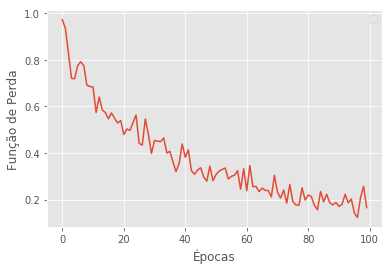

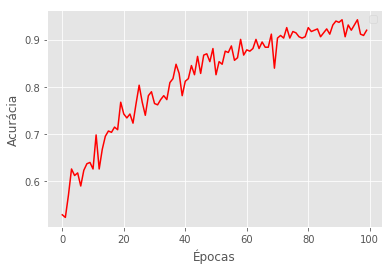

In [28]:
plt.figure(figsize=(6, 4))
#plt.title("Curva de Aprendizado")
plt.plot(rede.history["loss"])#, label="loss")
#plt.plot(rede.history["val_loss"], label="val_loss")
#plt.plot( np.argmin(rede.history["val_loss"]), np.min(rede.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Épocas")
plt.ylabel('Função de Perda')
plt.legend();

#Plot Accuracy vs Epoch
plt.figure(figsize=(6, 4))
accuracy = rede.history['accuracy']
#val_accuracy =rede.history['val_accuracy']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r')#, label='Acurácia de Treinamento')
#plt.plot(epochs, val_accuracy, 'b', label='Acurácia de Validação')
#plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

ACC Teste (calc):71.42857142857143%
Sensibilidade: 82.6086956521739%
Especificidade: 36.36363636363637%


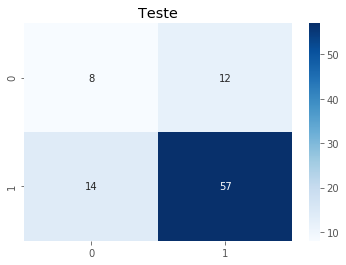

In [29]:
Y_pred = model.predict(X_valid)
y_pred = np.round(Y_pred)
cmat=confusion_matrix(y_valid,y_pred,labels=[0,1])
cm_df = pd.DataFrame(cmat)                      
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt="d")
plt.title('Teste')
print('ACC Teste (calc):'+str(np.sum(np.diag(cmat))*100/np.sum(cmat))+'%')
print('Sensibilidade: ' + str(cm_df.iloc[1][1]/(cm_df.iloc[0][1]+cm_df.iloc[1][1])*100)+'%')
print('Especificidade: ' + str(cm_df.iloc[0][0]/(cm_df.iloc[1][0]+cm_df.iloc[0][0])*100) + '%')